<a href="https://colab.research.google.com/github/Saarle/Regression-Project/blob/main/Regression_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Regression Project**





In [986]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import warnings
import seaborn as sns
import re

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor , plot_tree

from feature_engine.encoding import CountFrequencyEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')
%matplotlib inline

# create a function to read csv file directly from google drive

def csv_drive_path_generatoer(url):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path

In [904]:
# read the data
path = csv_drive_path_generatoer('https://drive.google.com/file/d/1R3vBFIn6YPrgpvyAADCY0yAYthaGy9NF/view?usp=sharing')
path_y = csv_drive_path_generatoer('https://drive.google.com/file/d/10wLZgOF00TY5Kmg0d_rn_agoEAFMVbwB/view?usp=sharing')
path_X_test = csv_drive_path_generatoer('https://drive.google.com/file/d/1Q_W-3CE0RppRIrfl_epEGnhJEQlfRb-5/view?usp=drive_link')
X = pd.read_csv(path)
y=  pd.read_csv(path_y)
X_test_pred = pd.read_csv(path_X_test)


In [905]:
# order the columns 
X.rename(columns = {"Unnamed: 0.1": "Id1",
                    "Unnamed: 0": "Id2",
                    "Education Level":"Education_Level",
                    "Job Title": "Job_Title",
                   "Years of Experience": "Years_of_Experience"},
                    inplace=True)

column_order =['id','Id1','Id2','Age','Gender','Education_Level','Job_Title','Years_of_Experience','Country','Race','height','weight','professionalism']
X = X[column_order]

# **EDA**


In [906]:
# set id as index
data = X.join(y)
data.sort_values(by='id')

,id,Id1,Id2,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Country,Race,height,weight,professionalism,Unnamed: 0,Salary
417,0,0,0,NaN,NaN,bachelor,software|enginee,120.0,RazShmuelykingdom,NayaCollegegeek,2.492683,200.000000,160.0,0,90000.0
2839,1,1,1,NaN,NaN,master,data|analys,120.0,RazShmuelykingdom,NayaCollegegeek,2.480525,200.000000,84.0,1,65000.0
5076,4,4,4,53.0,M,master,directo,22.0,us,Asian,1.522019,105.799514,1040.0,4,200000.0
3739,5,5,5,30.0,M,bachelor,marketing|analys,4.0,us,Hispanic,1.949831,49.868702,58.0,5,55000.0
2351,6,6,6,44.0,F,master,product|manage,13.0,us,Asian,1.537399,87.847470,504.0,6,120000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,6697,6697,6697,52.0,F,master's|degr,senior|product|marketing|manage,20.0,u,White,2.271163,106.654680,969.0,6697,190000.0
689,6698,6698,6698,39.0,M,bachelor's|degr,junior|sales|representativ,7.0,canad,Asian,2.394349,73.157479,222.0,6698,75000.0
1872,6699,6699,6699,50.0,F,p,director|of|marketin,22.0,u,Mixed,1.642822,96.333417,980.0,6699,200000.0
2225,6702,6702,6702,47.0,M,master's|degr,marketing|manage,15.0,chin,Korean,2.238909,108.154402,644.0,6702,140000.0


In [908]:
# check and drop duplicated columns 

def drop_duplicate_columns(data):
    columns_to_keep = data.T[~data.T.duplicated()].index

    return data[columns_to_keep]

data = drop_duplicate_columns(data)   

In [909]:
#describe() method to get the summary statistics of numeric columns

data.describe()

,id,Age,Years_of_Experience,height,weight,professionalism,Salary
count,5363.000000,5359.000000,5360.000000,5363.000000,5361.000000,5360.000000,5358.000000
mean,3362.789856,35.148722,9.660914,2.002573,66.937032,316.371735,115624.128779
std,1934.196180,7.615117,6.438456,0.292412,18.346610,304.989037,52754.945428
min,0.000000,22.000000,1.000000,1.500276,13.637206,0.000000,500.000000
25%,1692.500000,29.000000,5.000000,1.750666,53.891837,84.000000,70000.000000
50%,3363.000000,33.000000,8.000000,2.001049,64.747191,217.000000,115000.000000
75%,5044.500000,39.000000,13.000000,2.262341,78.374262,451.000000,160000.000000
max,6703.000000,64.000000,120.000000,2.499932,200.000000,2040.000000,250000.000000


In [398]:
#info() method to check out datatypes, missing values and more

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5363 non-null   int64  
 1   Age                  5359 non-null   float64
 2   Gender               5359 non-null   object 
 3   Education_Level      5360 non-null   object 
 4   Job_Title            5361 non-null   object 
 5   Years_of_Experience  5360 non-null   float64
 6   Country              5363 non-null   object 
 7   Race                 5363 non-null   object 
 8   height               5363 non-null   float64
 9   weight               5361 non-null   float64
 10  professionalism      5360 non-null   float64
 11  Salary               5358 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 502.9+ KB


In [910]:
# set id as index
data.set_index('id' , inplace= True)
data.sort_values(by='id')

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Country,Race,height,weight,professionalism,Salary
id,,,,,,,,,,,
0,NaN,NaN,bachelor,software|enginee,120.0,RazShmuelykingdom,NayaCollegegeek,2.492683,200.000000,160.0,90000.0
1,NaN,NaN,master,data|analys,120.0,RazShmuelykingdom,NayaCollegegeek,2.480525,200.000000,84.0,65000.0
4,53.0,M,master,directo,22.0,us,Asian,1.522019,105.799514,1040.0,200000.0
5,30.0,M,bachelor,marketing|analys,4.0,us,Hispanic,1.949831,49.868702,58.0,55000.0
6,44.0,F,master,product|manage,13.0,us,Asian,1.537399,87.847470,504.0,120000.0
...,...,...,...,...,...,...,...,...,...,...,...
6697,52.0,F,master's|degr,senior|product|marketing|manage,20.0,u,White,2.271163,106.654680,969.0,190000.0
6698,39.0,M,bachelor's|degr,junior|sales|representativ,7.0,canad,Asian,2.394349,73.157479,222.0,75000.0
6699,50.0,F,p,director|of|marketin,22.0,u,Mixed,1.642822,96.333417,980.0,200000.0


In [911]:
# drop rows with nulls values 

def drop_na(data):
    # (data[data.isnull().any(axis=1)])
    data.dropna(inplace = True)

drop_na(data)

<Axes: >

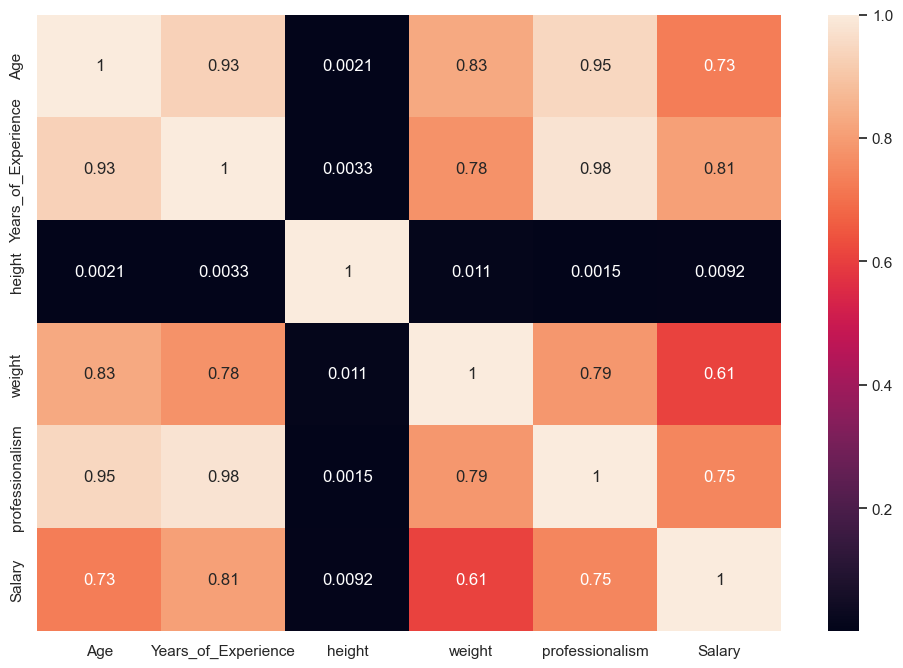

In [912]:
#use correlation to find the relationship between the variables
#use heatmap to visualize the correlation

cor = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor , annot= True)

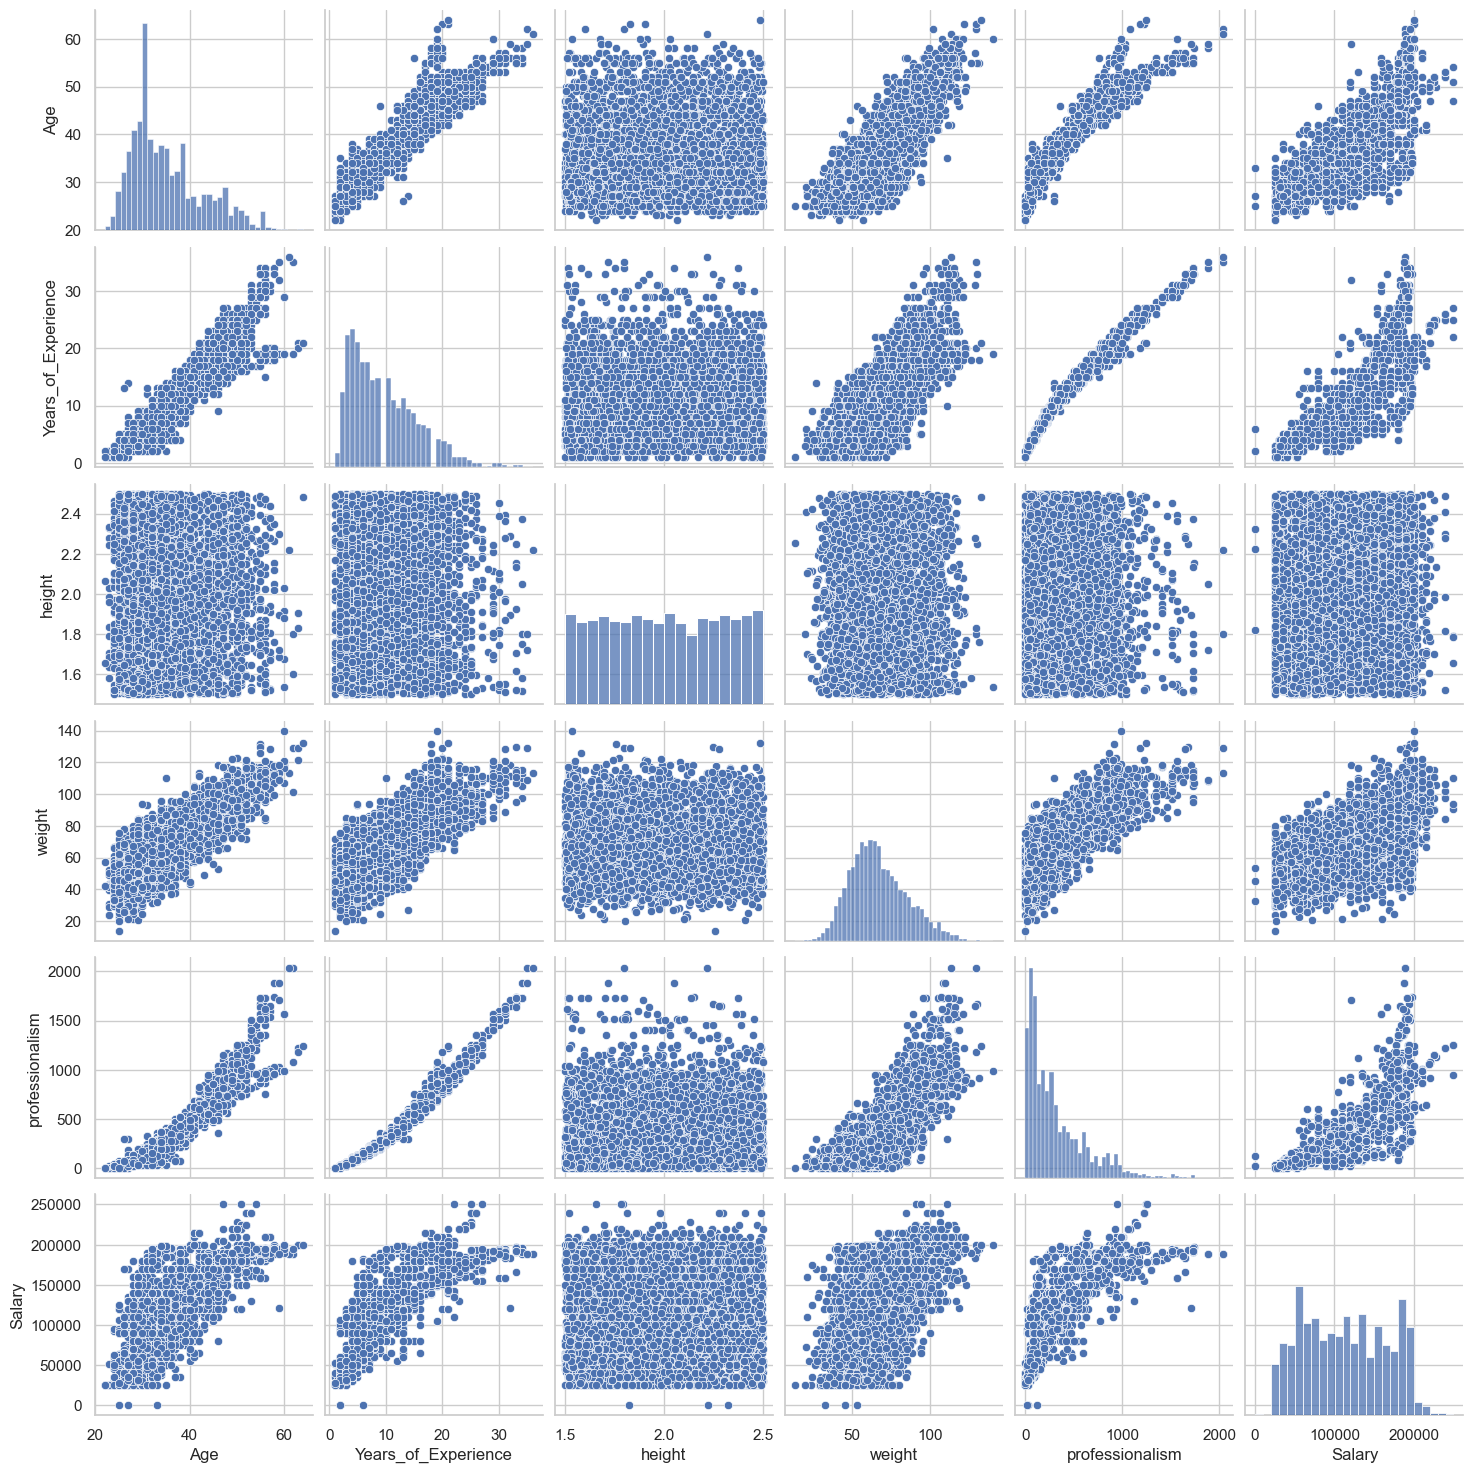

In [913]:
#use pairplot to see the relationship between the variables
sns.pairplot(data)

In [914]:
# check the sum od rows per gender
print(data.groupby('Gender').size())

# drop the gender O from the data
# data = data.loc[data['Gender']!='O']

Gender
F    2402
M    2941
O      12
dtype: int64


<Figure size 800x600 with 0 Axes>

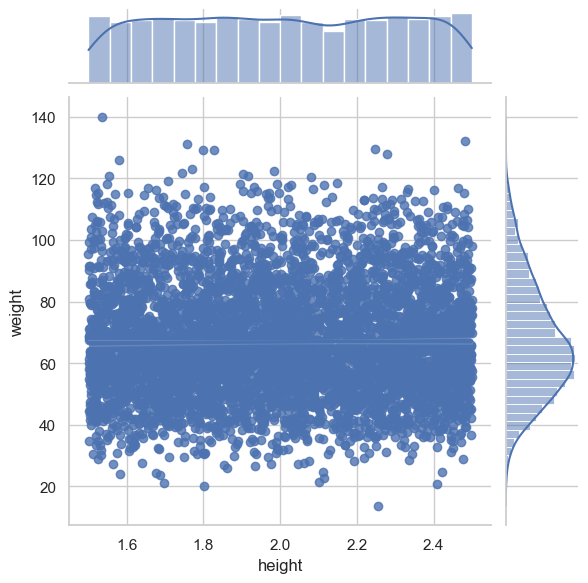

In [404]:
# use jointplot to display the relationship between height and weight

plt.figure(figsize=(8, 6))
sns.jointplot(x='height', y='weight', data=data, kind='reg')

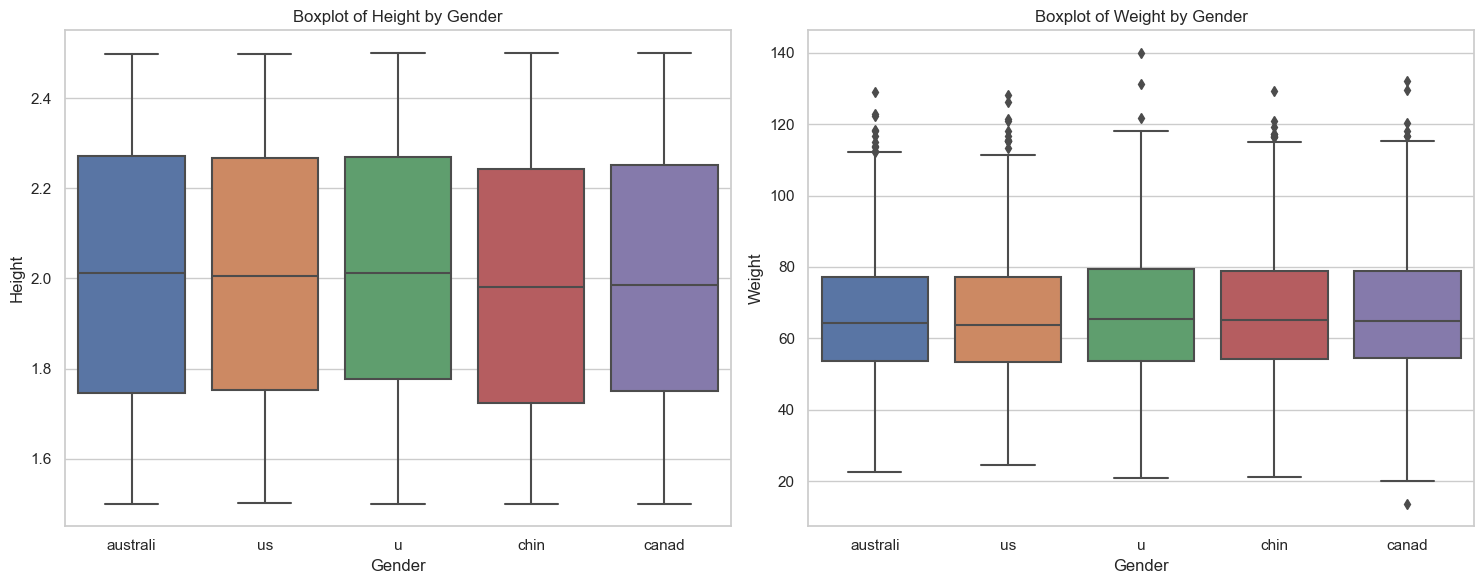

In [405]:
# Create two separate subplots for each box plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Create the first box plot for "height"
sns.boxplot(data=data, x="Country", y="height", ax=axes[0])
axes[0].set_title('Boxplot of Height by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Height')

# Create the second box plot for "weight"
sns.boxplot(data=data, x="Country", y="weight", ax=axes[1])
axes[1].set_title('Boxplot of Weight by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Weight')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

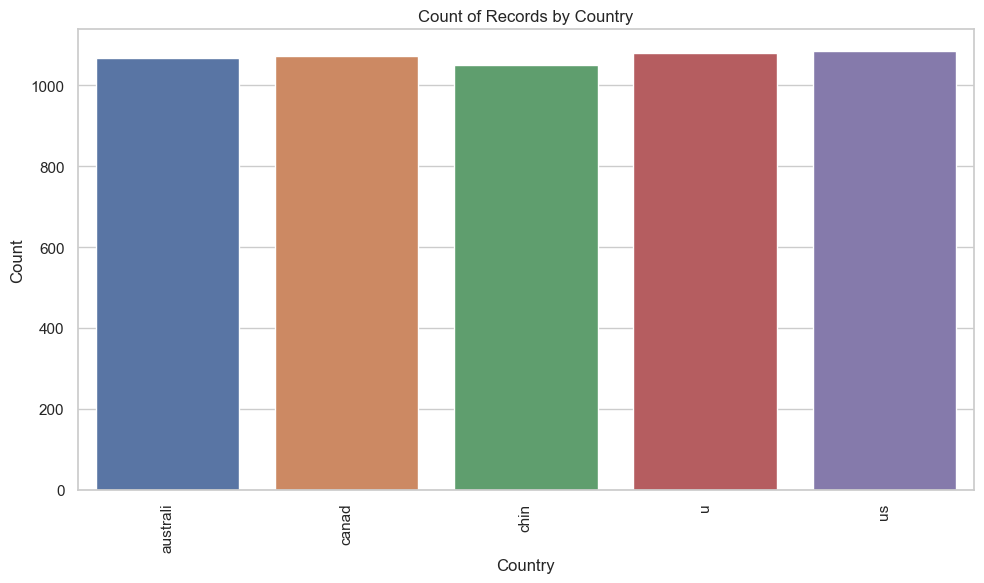

In [406]:
#use barplot to show the count of records by country 
country = data.groupby('Country').size().reset_index(name='Count')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=country, x='Country', y='Count')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Records by Country')
plt.tight_layout()

<Axes: xlabel='Education_Level', ylabel='Salary'>

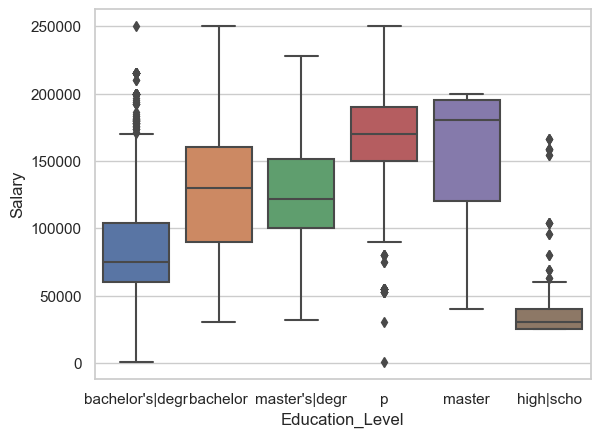

In [407]:
#use boxplot to see the relationship between education level and salary
sns.boxplot(x='Education_Level',y='Salary',data=data)

<Axes: xlabel='Gender', ylabel='Salary'>

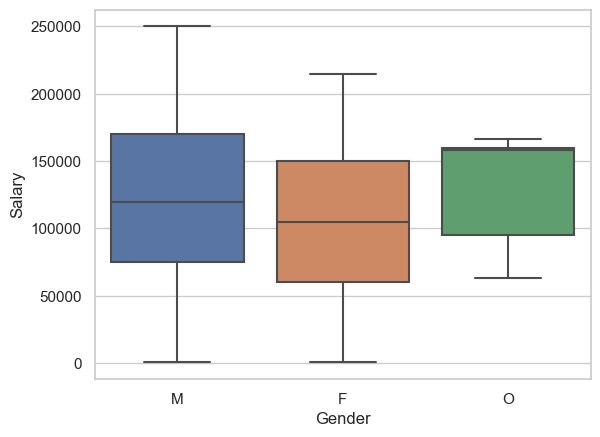

In [408]:
#use boxplot to see the distribution of salary
sns.boxplot(x='Gender',y='Salary',data=data)

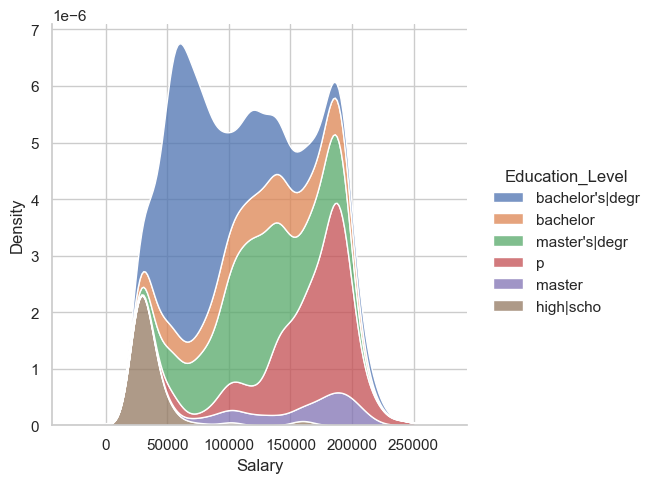

In [605]:
#use displot to plot the distribution of the salary for each education level
sns.displot(data=data, x="Salary", hue="Education_Level", multiple="stack",kind="kde")

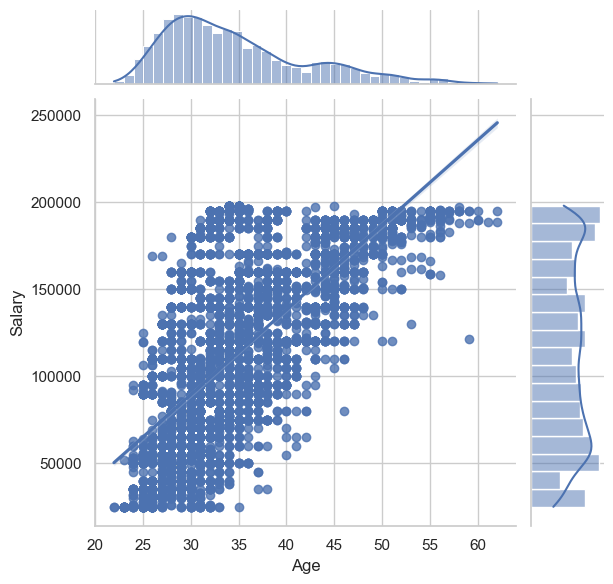

In [698]:
# sns.set(style="whitegrid")
sns.jointplot(x='Age', y='Salary', data=data, kind='reg')


In [694]:

# Define bin edges
age_bins = [20,50,80]

# Create a new column 'AgeBin' with bin labels
data['AgeBin'] = pd.cut(data['Age'], bins=age_bins, labels=['20-49','50-80'])

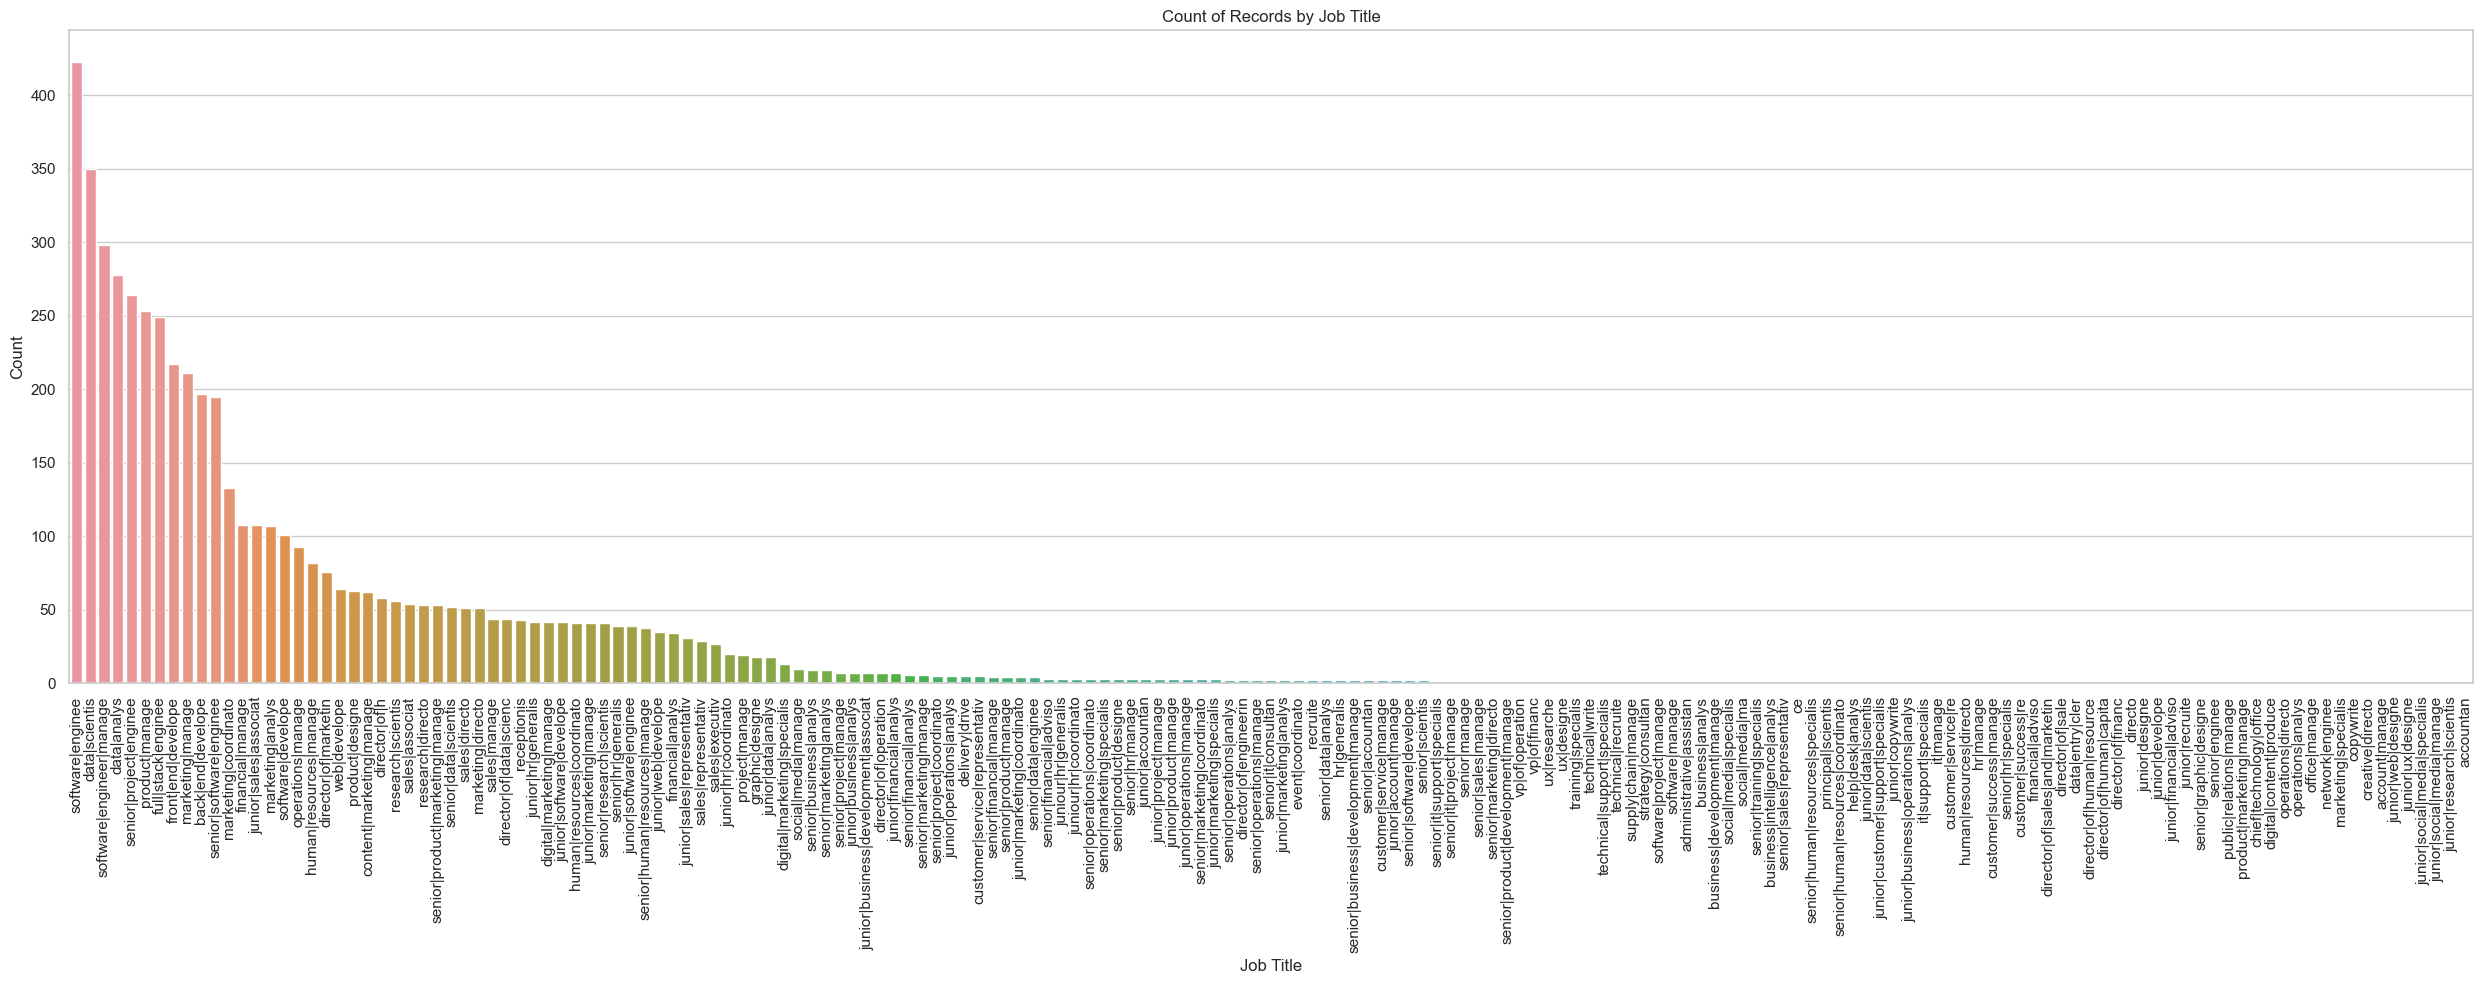

In [915]:
job = data.groupby('Job_Title').size().reset_index(name='count').sort_values(by='count' ,ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(25, 10))
sns.barplot(data=job, x='Job_Title', y='count')
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Count of Records by Job Title')
plt.tight_layout()

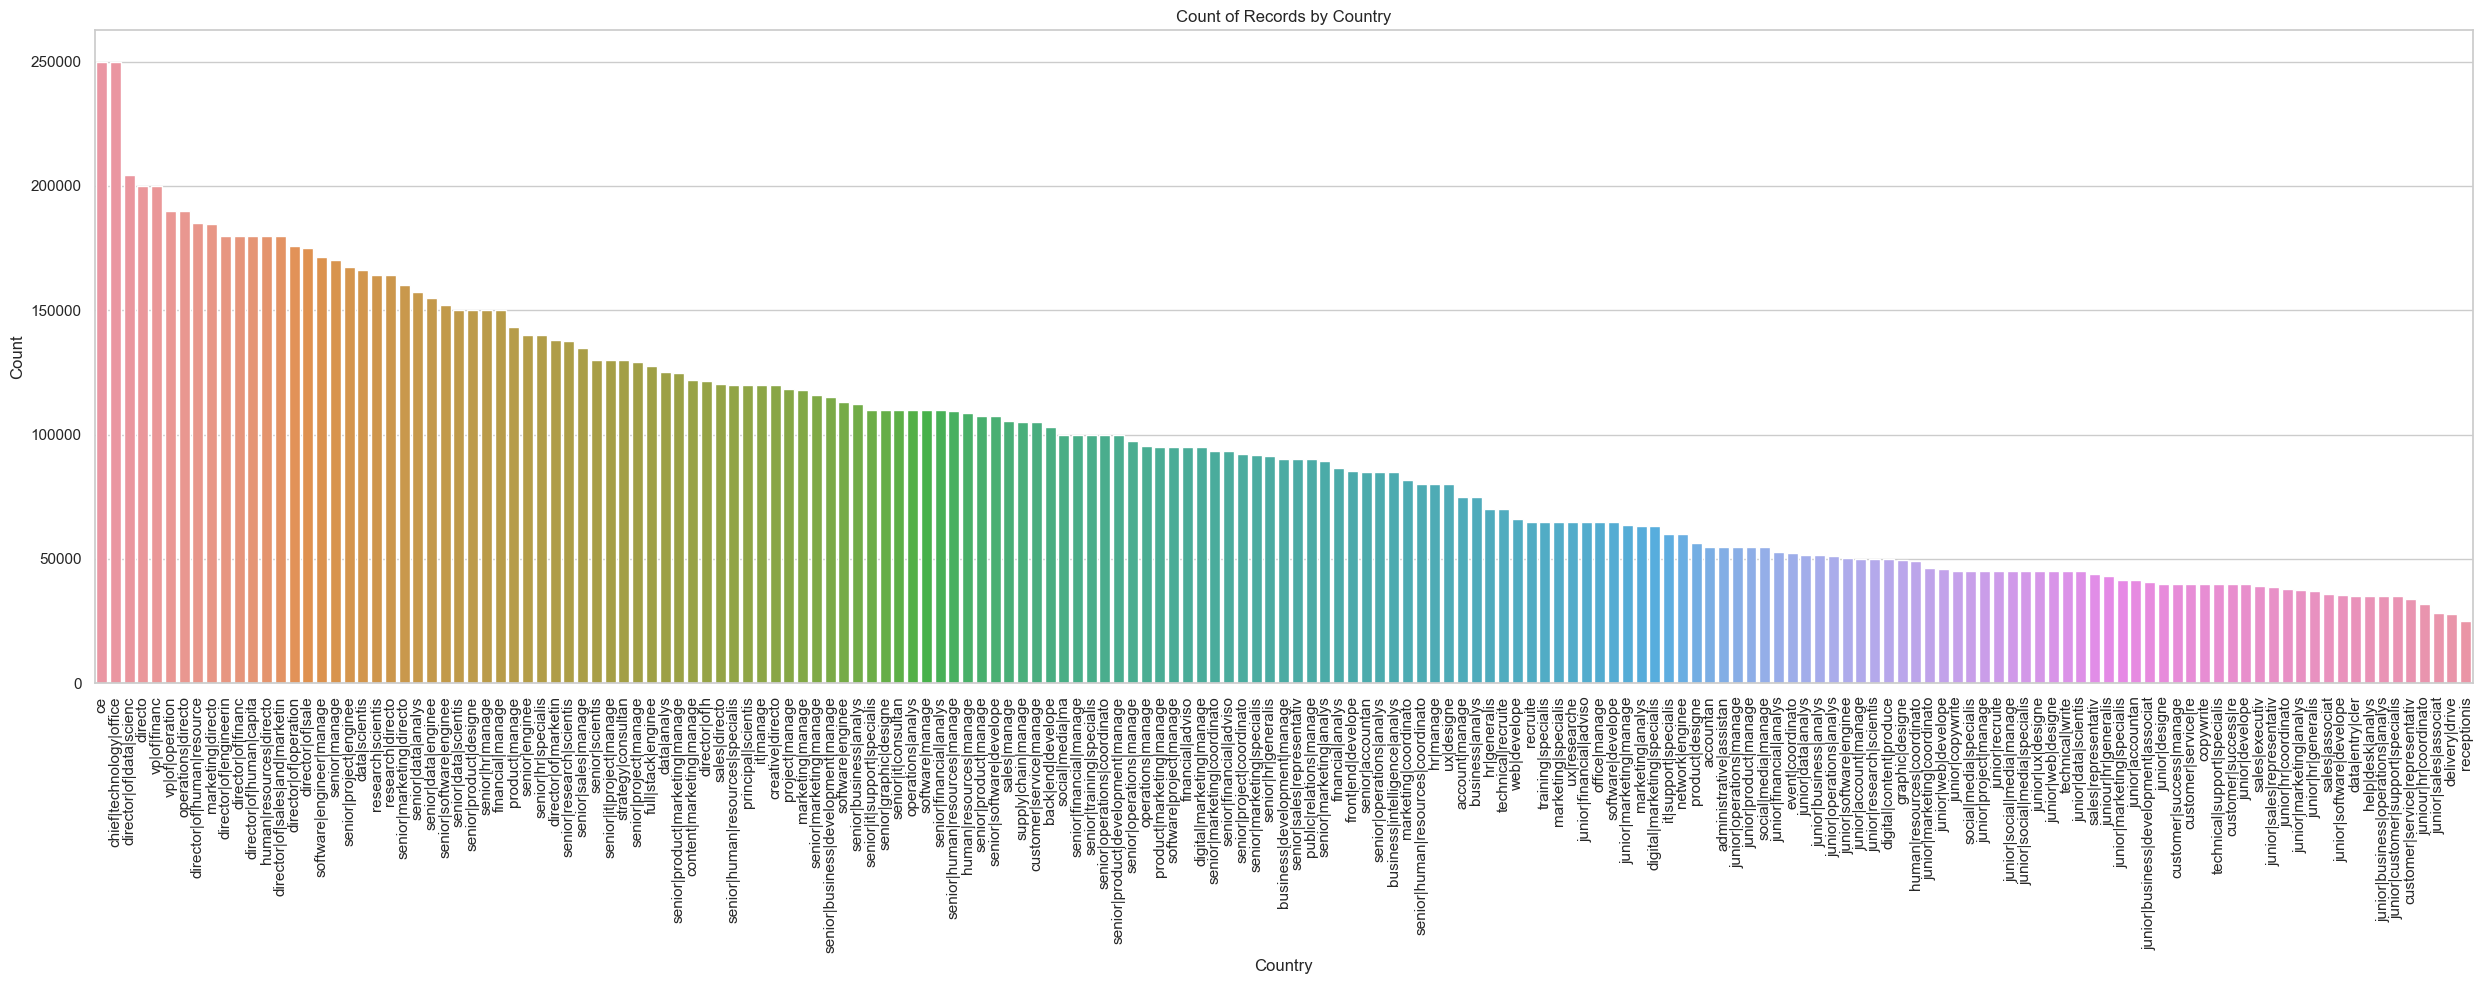

In [18]:
job = data.groupby('Job_Title')['Salary'].mean().reset_index(name='mean').sort_values(by='mean' ,ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(25, 10))
sns.barplot(data=job, x='Job_Title', y='mean')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Records by Country')
plt.tight_layout()

<Axes: xlabel='Salary', ylabel='Density'>

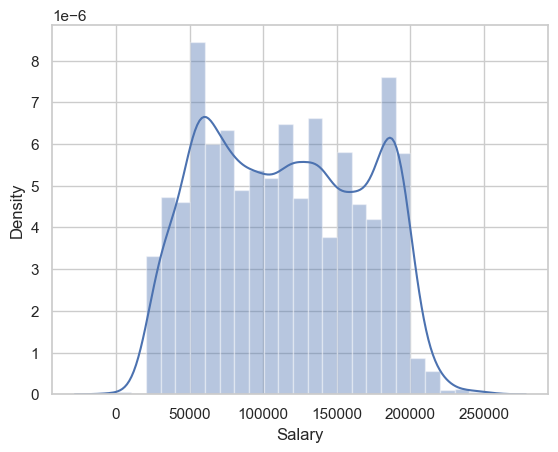

In [916]:

sns.distplot(data["Salary"])

# **Feature Engineering**

In [984]:
def clean_similar_strings(column):
    similar_strings_mapping = {
        r"bachelor's\|degr": "bachelor",
        r"master's\|degr": "master",
        r"high\|scho": "high_school",

        
        # Add more patterns and replacements as needed
    }

    cleaned_values = []
    for value in column:
        if isinstance(value, str):  # Check if the value is a string
            for pattern, replacement in similar_strings_mapping.items():
                value = re.sub(pattern, replacement, value, flags=re.IGNORECASE)
        cleaned_values.append(value)

    return cleaned_values


data['Education_Level']= clean_similar_strings(data['Education_Level'])

data.Education_Level.unique()

array(['bachelor', 'master', 'p', 'high_school'], dtype=object)

In [992]:
class DataPipeline:
    def __init__(self, data):
        self.data = data

    def transform_column_with_encoder(self, column_name):
        le = preprocessing.LabelEncoder()
        le.fit(self.data[column_name])
        transformed_column = le.transform(self.data[column_name])
        return transformed_column

    def add_encoded_data(self, column_name):
        transformed_data = self.transform_column_with_encoder(column_name)
        self.data['Transformed_' + column_name] = transformed_data

    def count_encode_column(self, column_name):
        encoder = CountFrequencyEncoder(encoding_method='count', variables=[column_name])
        encoder.fit(self.data)
        transformed_data = encoder.transform(self.data)

        transformed_column_name = column_name + '_frequency'
        self.data[transformed_column_name] = transformed_data[column_name]

    def k_means(self, column_name, num_clusters):
        num_clusters = num_clusters
        X = self.data[[column_name, 'Salary']]
        kmeans = KMeans(n_clusters=num_clusters)
        transformed_column_name = 'k_Means_' + column_name
        self.data[transformed_column_name] = kmeans.fit_predict(X)

    def target_encode_categorical(self, categorical_col):
        category_means = self.data.groupby(categorical_col)['Salary'].mean()
        encoded_col = f'{categorical_col}_mean_target'
        self.data[encoded_col] = self.data[categorical_col].map(category_means)

    def compute_column_median(self, column_name):
        column_median = self.data.groupby(column_name)['Salary'].median().reset_index()
        transformed_column_name = column_name + '_median'
        self.data[transformed_column_name] = self.data[column_name].map(column_median.set_index(column_name)['Salary'])

    def ordinal_encode_column(self, column_name, ordered_categories):
        encoder = OrdinalEncoder(categories=[ordered_categories])
        transformed_data = encoder.fit_transform(self.data[[column_name]])
        self.data['Encoded_' + column_name] = transformed_data.flatten()    
  

    def run_pipeline(self):
        self.add_encoded_data('Job_Title')
        self.count_encode_column('Job_Title')
        self.k_means('Age', 2)
        self.target_encode_categorical('Job_Title')
        self.compute_column_median('Education_Level')
        self.ordinal_encode_column('Education_Level', ordered_categories=['high_school', "bachelor", "master", 'p'])

pipeline = DataPipeline(data)
pipeline.run_pipeline()

In [988]:
data

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Country,Race,height,weight,professionalism,Salary,Transformed_Job_Title,Job_Title_frequency,k_Means_Age,Job_Title_mean_target,Job_Title_median,Education_Level_median,Encoded_Education_Level
id,,,,,,,,,,,,,,,,,,
2477,52.0,M,bachelor,back|end|develope,24.0,australi,Asian,1.800316,95.021957,1150.0,175966.0,3,197,1,103240.365482,100000.0,80000.0,1.0
76,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,1100.0,160000.0,92,93,1,95333.333333,96000.0,80000.0,1.0
64,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,26.0,35000.0,47,3,0,41666.666667,40000.0,80000.0,1.0
924,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,279.0,195000.0,15,278,1,125118.705036,120000.0,80000.0,1.0
242,39.0,F,bachelor,senior|product|manage,11.0,chin,Korean,1.794105,72.049210,380.0,120000.0,139,4,1,107500.000000,107500.0,80000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,32.0,F,bachelor,junior|business|development|associat,4.0,canad,Black,2.329507,64.070050,93.0,50000.0,50,7,0,40714.285714,40000.0,80000.0,1.0
3677,44.0,M,p,data|scientis,15.0,chin,White,1.945457,93.478548,546.0,140000.0,17,326,1,161573.619632,170000.0,170000.0,3.0
6032,25.0,M,high_school,delivery|drive,1.0,canad,Asian,1.575751,38.216264,0.0,28000.0,18,5,0,28000.000000,28000.0,30000.0,0.0


In [993]:
# data = pd.get_dummies(data,columns=['Gender'])
data = data[(data['Salary']<200000) & (data['Salary']>20000)]


In [776]:
# Split values in the 'Job_Title' column and convert to lowercase
data['Job_Title'] = data['Job_Title'].str.split('|').str.join(' ').str.lower()

data

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Country,Race,height,weight,professionalism,Salary,Education_Level_mean,Transformed_Job_Title,Job_Title_frequency,k_Means_Age,Job_Title_mean_target
id,,,,,,,,,,,,,,,,
2477,52.0,M,bachelor's|degr,back end develope,24.0,australi,Asian,1.800316,95.021957,1150.0,175966.0,75000.0,3,197,0,103240.365482
76,52.0,F,bachelor,operations manage,23.0,us,White,2.451414,87.456039,1100.0,160000.0,130000.0,95,93,0,95333.333333
64,27.0,M,bachelor,junior accountan,2.0,australi,Australian,1.917509,56.997108,26.0,35000.0,130000.0,50,3,1,41666.666667
924,32.0,M,bachelor,data analys,11.0,u,Welsh,2.160562,61.403169,279.0,195000.0,130000.0,17,278,0,125118.705036
242,39.0,F,bachelor,senior product manage,11.0,chin,Korean,1.794105,72.049210,380.0,120000.0,130000.0,142,4,0,107500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,32.0,F,bachelor,junior business development associat,4.0,canad,Black,2.329507,64.070050,93.0,50000.0,130000.0,53,7,1,40714.285714
3677,44.0,M,p,data scientis,15.0,chin,White,1.945457,93.478548,546.0,140000.0,170000.0,19,350,0,161573.619632
6032,25.0,M,high|scho,delivery drive,1.0,canad,Asian,1.575751,38.216264,0.0,28000.0,30000.0,20,5,1,28000.000000


### **Linear Regression Model**

## Linear regression pipeline using gridearch

In [996]:

# Define your features and target variable
X = data[['Years_of_Experience','professionalism','Education_Level_median','Job_Title_frequency','Job_Title_mean_target','k_Means_Age','Encoded_Education_Level']]
y = data.Salary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline: pipeline
lnr_pipe = Pipeline([
    ('ssc', StandardScaler()),
    ('lnr', LinearRegression())
])

# Create a parameter grid for GridSearchCV for Linear Regression
lnr_params = {
    'lnr__fit_intercept': [True, False]
}

# Instantiate the GridSearchCV object for Linear Regression
gs_lnr = GridSearchCV(lnr_pipe, param_grid=lnr_params, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV for Linear Regression to the training data
gs_lnr.fit(X_train, y_train)

# Get the best parameters and best RMSE for Linear Regression
best_lnr_params = gs_lnr.best_params_
best_lnr_rmse = np.sqrt(-gs_lnr.best_score_)

# Print the best parameters and lowest RMSE for Linear Regression
print("Best Linear Regression parameters found: ", best_lnr_params)
print("Best Linear Regression RMSE found: ", best_lnr_rmse)

# Calculate and print the test RMSE for Linear Regression
lnr_test_predictions = gs_lnr.predict(X_test)
lnr_test_rmse = np.sqrt(mean_squared_error(y_test, lnr_test_predictions))
print("Test RMSE for Linear Regression: ", lnr_test_rmse)

# Predict y_train for Linear Regression
lnr_train_predictions = gs_lnr.predict(X_train)
lnr_train_rmse = np.sqrt(mean_squared_error(y_train, lnr_train_predictions))
print("Train RMSE for Linear Regression: ", lnr_train_rmse)

# Create a parameter grid for GridSearchCV for Lasso Regression
# ... (remaining code)

# Fit the GridSearchCV for Lasso Regression to the training data
gs_lasso.fit(X_train, y_train)

# Get the best parameters and best RMSE for Lasso Regression
best_lasso_params = gs_lasso.best_params_
best_lasso_rmse = np.sqrt(-gs_lasso.best_score_)

# Print the best parameters and lowest RMSE for Lasso Regression
print("Best Lasso Regression parameters found: ", best_lasso_params)
print("Best Lasso Regression RMSE found: ", best_lasso_rmse)

# Calculate and print the test RMSE for Lasso Regression
lasso_test_predictions = gs_lasso.predict(X_test)
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_predictions))
print("Test RMSE for Lasso Regression: ", lasso_test_rmse)

# Predict y_train for Lasso Regression
lasso_train_predictions = gs_lasso.predict(X_train)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_train_predictions))
print("Train RMSE for Lasso Regression: ", lasso_train_rmse)

Best Linear Regression parameters found:  {'lnr__fit_intercept': True}
Best Linear Regression RMSE found:  16579.447419222313
Test RMSE for Linear Regression:  16430.51983798744
Train RMSE for Linear Regression:  16547.810876806227
Best Lasso Regression parameters found:  {'lnr__alpha': 0.001, 'lnr__fit_intercept': True}
Best Lasso Regression RMSE found:  16580.70203712642
Test RMSE for Lasso Regression:  16427.22250758782
Train RMSE for Lasso Regression:  16550.91909607286


In [ ]:
X_test['y'] = y_test
X_test['Predicted'] = lnr_test_predictions
X_test['Residual'] = abs(y_test - y_pred_test_linear)/y_test
X_test[X_test['Residual'] > 0.3]


<Figure size 640x480 with 0 Axes>

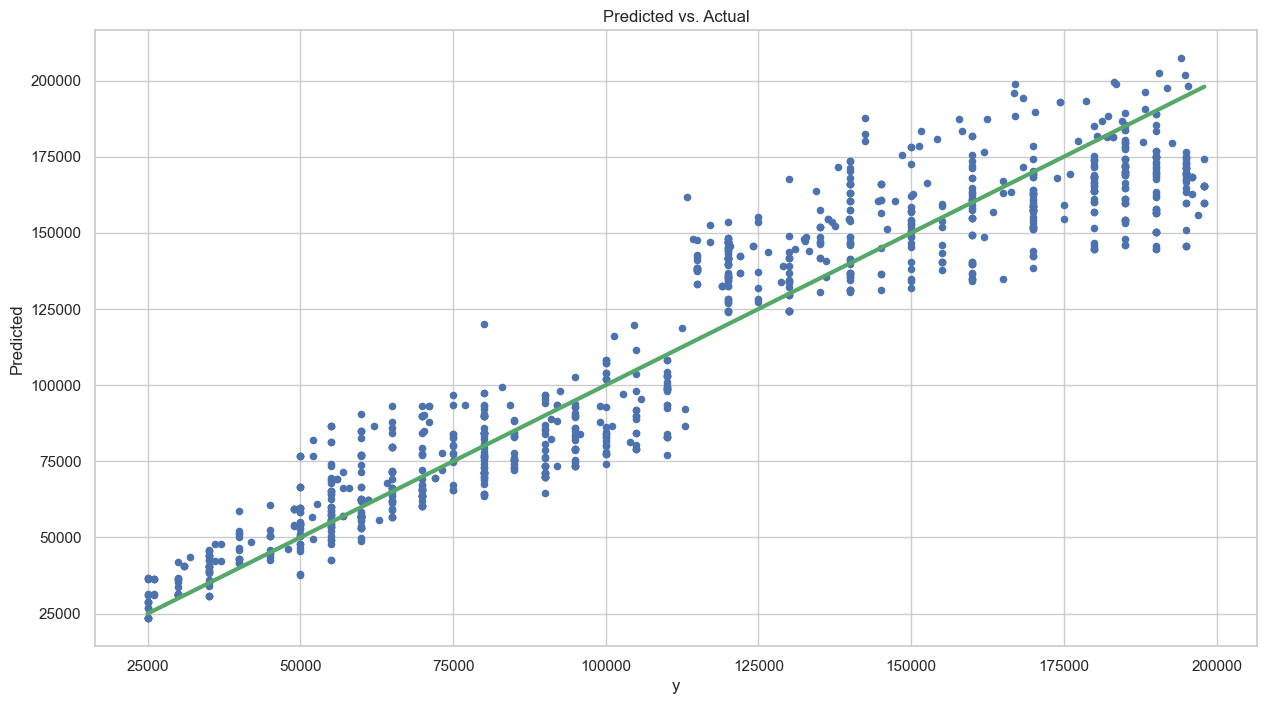

In [998]:
plt.figure()
amin, amax = min(X_test['y']), max(X_test['y'])
ax = X_test.plot('y', 'Predicted', kind='scatter',
                #        c=colors, 
                    #  xlim=[amin, amax], ylim=[amin, amax],
                     title='Predicted vs. Actual',
                     figsize = (15,8))
ax.plot(np.linspace(amin, amax, 2), np.linspace(amin, amax, 2),
        linewidth=3, color='g')                    

(array([  4.,  23., 101., 145., 254., 222., 152.,  85.,  37.,  13.]),
 array([-48499.1664492 , -38717.1231767 , -28935.07990421, -19153.03663171,
         -9370.99335921,    411.04991328,  10193.09318578,  19975.13645828,
         29757.17973077,  39539.22300327,  49321.26627577]),
 <BarContainer object of 10 artists>)

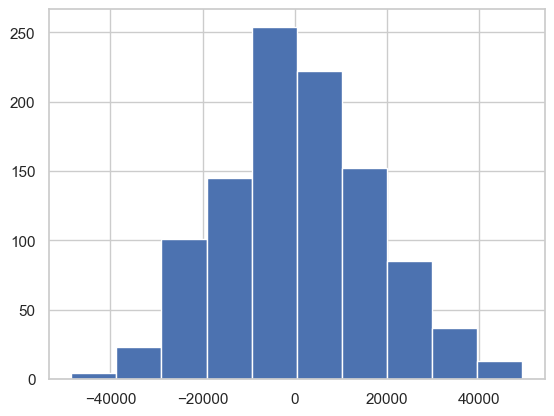

In [999]:
plt.hist(X_test['y']-X_test['Predicted'])

### **KNN Model**

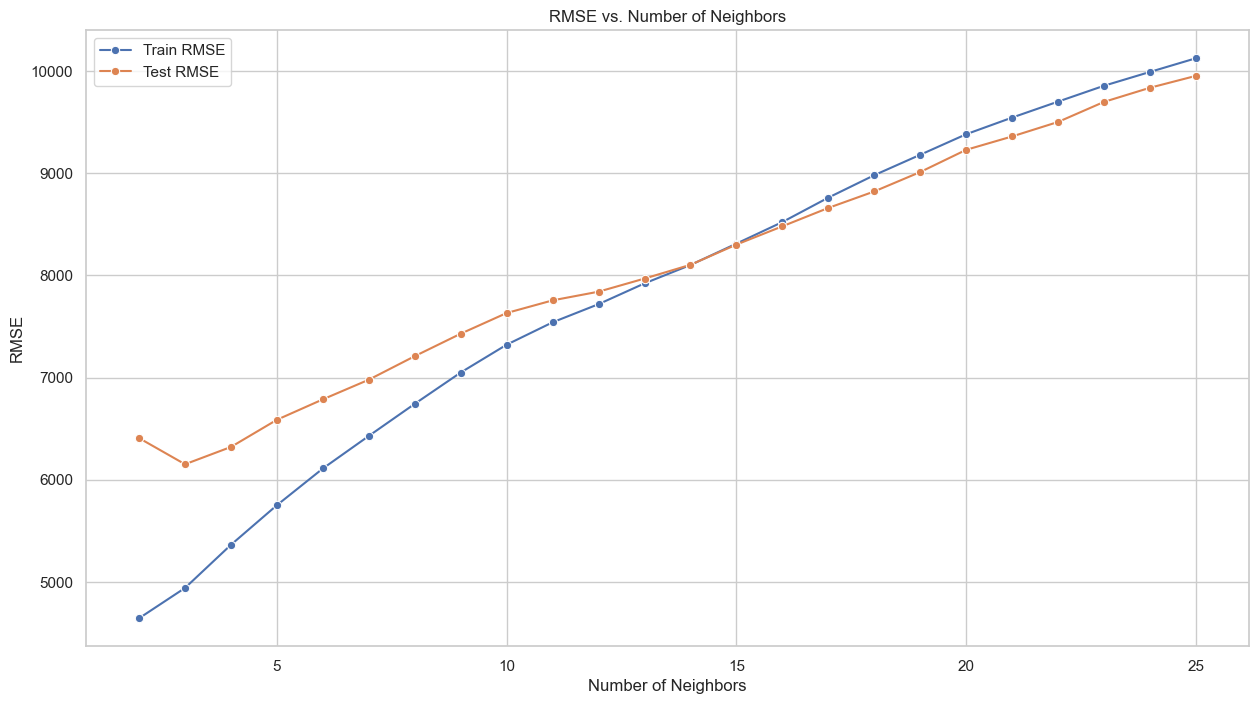

In [1002]:


# Define features and target
X = data[['Years_of_Experience','professionalism','Education_Level_median','Job_Title_frequency','Job_Title_mean_target','k_Means_Age']]
y = data.Salary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_neighbors= []
rmse_train_l = []
rmse_test_l = []

for i in range(2,26):

    # Create a KNeighborsRegressor model
    model = KNeighborsRegressor(n_neighbors=i)  # You can adjust the number of neighbors

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the train data
    y_pred_train = model.predict(X_train_scaled)

    # Make predictions on the test data
    y_pred_test = model.predict(X_test_scaled)

    # Calculate RMSE
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

    n_neighbors.append(i) 
    rmse_train_l.append(rmse_train)
    rmse_test_l.append(rmse_test)

    # You can add the predicted salaries back to the DataFrame if needed
    # data['Predicted_Salary_knn'] = y_pred

    # Print the DataFrame with predicted salaries and RMSE

    # print("Root Mean Squared Error:", rmse)
   

plt.figure(figsize=(15, 8))
sns.lineplot(x=n_neighbors, y=rmse_train_l, marker='o', label='Train RMSE')
sns.lineplot(x=n_neighbors, y=rmse_test_l, marker='o', label='Test RMSE')
# plt.scatter(n_neighbors[np.argmin(rmse_test)], min(rmse_test), color='r', label=f'Min Test RMSE: {min(rmse_test):.2f}')
plt.title('RMSE vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()

In [1003]:
    model = KNeighborsRegressor(n_neighbors=4)  
    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the train data
    y_pred_train = model.predict(X_train_scaled)

    # Make predictions on the test data
    y_pred_test = model.predict(X_test_scaled)

    # Calculate RMSE
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

    print(f'RMSE for train data: {rmse_train}')
    print(f'RMSE for test data: {rmse_test}')

RMSE for train data: 5365.10176094467
RMSE for test data: 6322.2109510760465


In [1004]:
X_test['y'] = y_test
X_test['Predicted'] = y_pred_test
X_test['Residual'] = abs(y_test - y_pred_test)/y_test
X_test[X_test['Residual'] > 0.3]

,Years_of_Experience,professionalism,Education_Level_median,Job_Title_frequency,Job_Title_mean_target,k_Means_Age,y,Predicted,Residual
id,,,,,,,,,
81,15.0,533.0,126916.0,278,125118.705036,1,80000.0,110000.0,0.375000
89,7.0,186.0,80000.0,133,81639.097744,1,55000.0,90000.0,0.636364
2984,5.0,78.0,126916.0,249,127233.722892,1,70216.0,95919.5,0.366063


<Figure size 640x480 with 0 Axes>

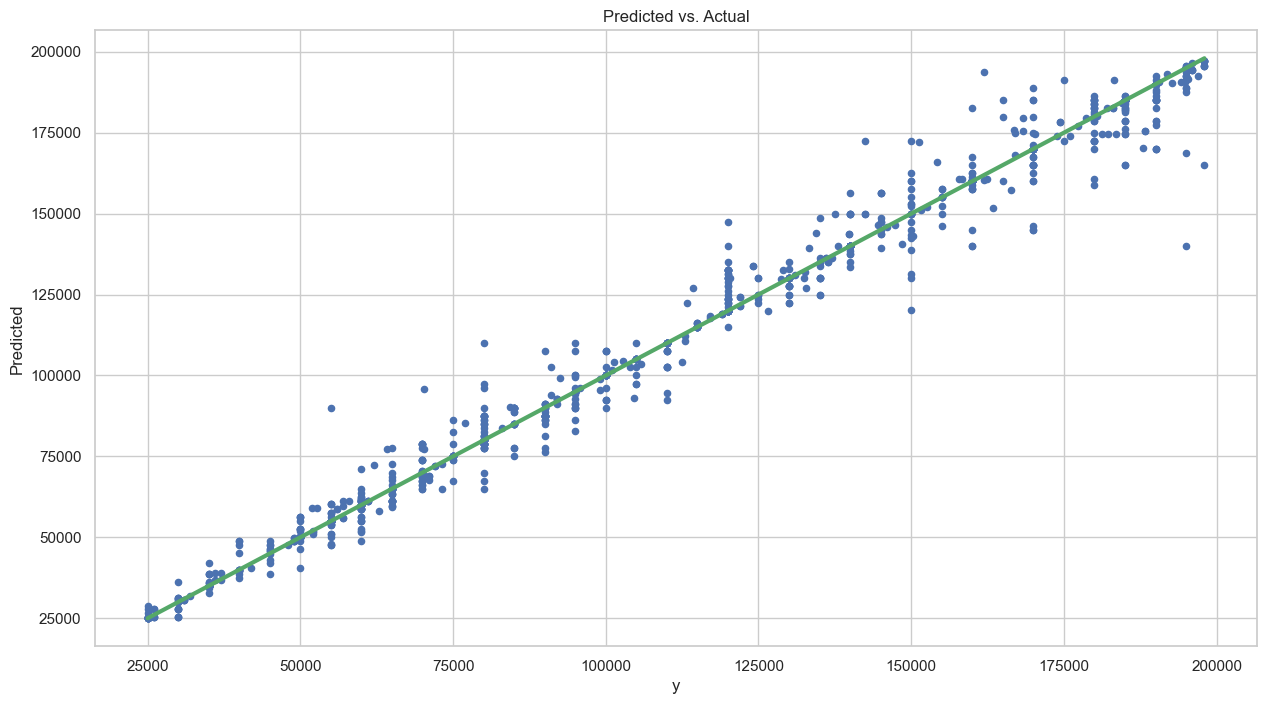

In [1005]:
plt.figure()
amin, amax = min(X_test['y']), max(X_test['y'])
ax = X_test.plot('y', 'Predicted', kind='scatter',
                #        c=colors, 
                    #  xlim=[amin, amax], ylim=[amin, amax],
                     title='Predicted vs. Actual',
                     figsize = (15,8))
ax.plot(np.linspace(amin, amax, 2), np.linspace(amin, amax, 2),
        linewidth=3, color='g')        

(array([  2.,   3.,  14.,  45., 178., 692.,  82.,   9.,   8.,   3.]),
 array([-35000.   , -28201.225, -21402.45 , -14603.675,  -7804.9  ,
         -1006.125,   5792.65 ,  12591.425,  19390.2  ,  26188.975,
         32987.75 ]),
 <BarContainer object of 10 artists>)

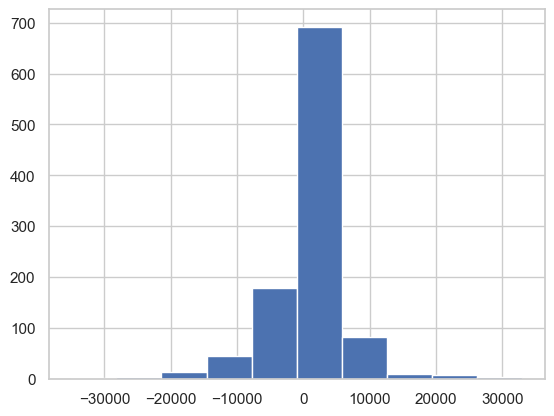

In [956]:
plt.hist(X_test['y']-X_test['Predicted'])

### **Decision Tree Regressor Model**

Train Root Mean Squared Error: 10520.319936469004
Test Root Mean Squared Error: 10198.2457757693


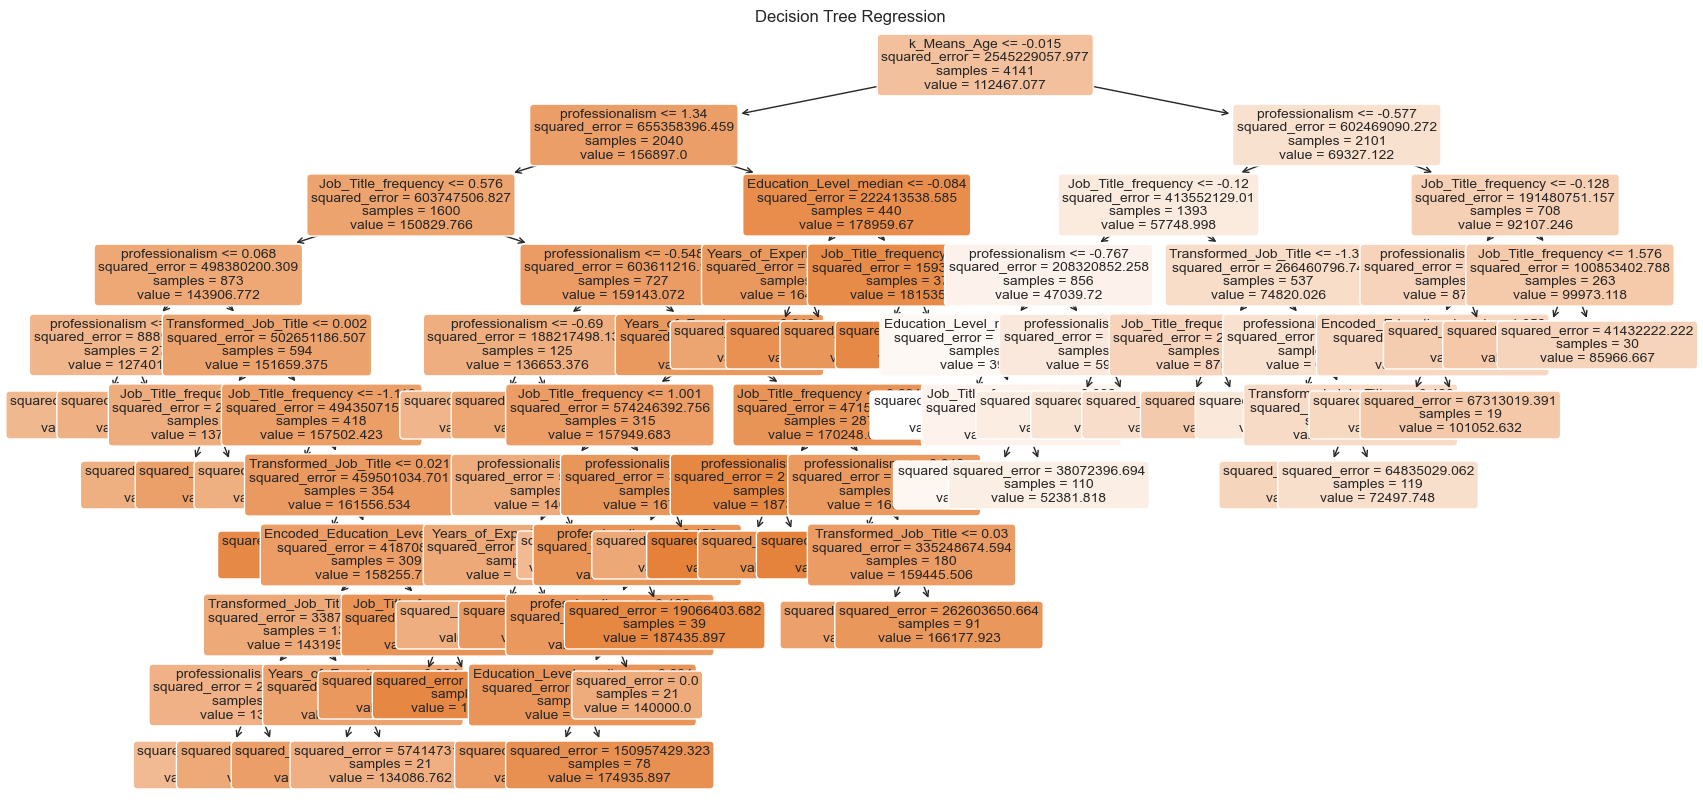

In [1006]:


# Assuming you have loaded your data into the 'data' DataFrame

# Define features and target
X = data[['Years_of_Experience', 'professionalism', 'Education_Level_median','Job_Title_frequency', 'Transformed_Job_Title', 'k_Means_Age','Encoded_Education_Level']]
y = data.Salary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DecisionTreeRegressor model
model = DecisionTreeRegressor(max_leaf_nodes=46)  

# Train the model on the entire data
model.fit(X_train_scaled, y_train)

# Make predictions on the train data
y_pred_train = model.predict(X_train_scaled)

# Make predictions on the test data
y_pred_test = model.predict(X_test_scaled)

# Calculate RMSE
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# You can add the predicted salaries back to the DataFrame if needed
# data['Predicted_Salary'] = y_pred

# Print the RMSE
print("Train Root Mean Squared Error:", rmse_train)
print("Test Root Mean Squared Error:", rmse_test)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_test.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Regression')
plt.show()
# data

In [1007]:
feature_importances = model.feature_importances_

# Print feature names and their importances
for feature_name, importance in zip(X_test.columns, feature_importances):
    print(f"Feature: {feature_name},    Importance: {importance}")

Feature: Years_of_Experience,    Importance: 0.005276900637648782
Feature: professionalism,    Importance: 0.125515361641353
Feature: Education_Level_median,    Importance: 0.005613532590070789
Feature: Job_Title_frequency,    Importance: 0.05625954550240402
Feature: Transformed_Job_Title,    Importance: 0.013759828252012482
Feature: k_Means_Age,    Importance: 0.7872926607822464
Feature: Encoded_Education_Level,    Importance: 0.006282170594264538


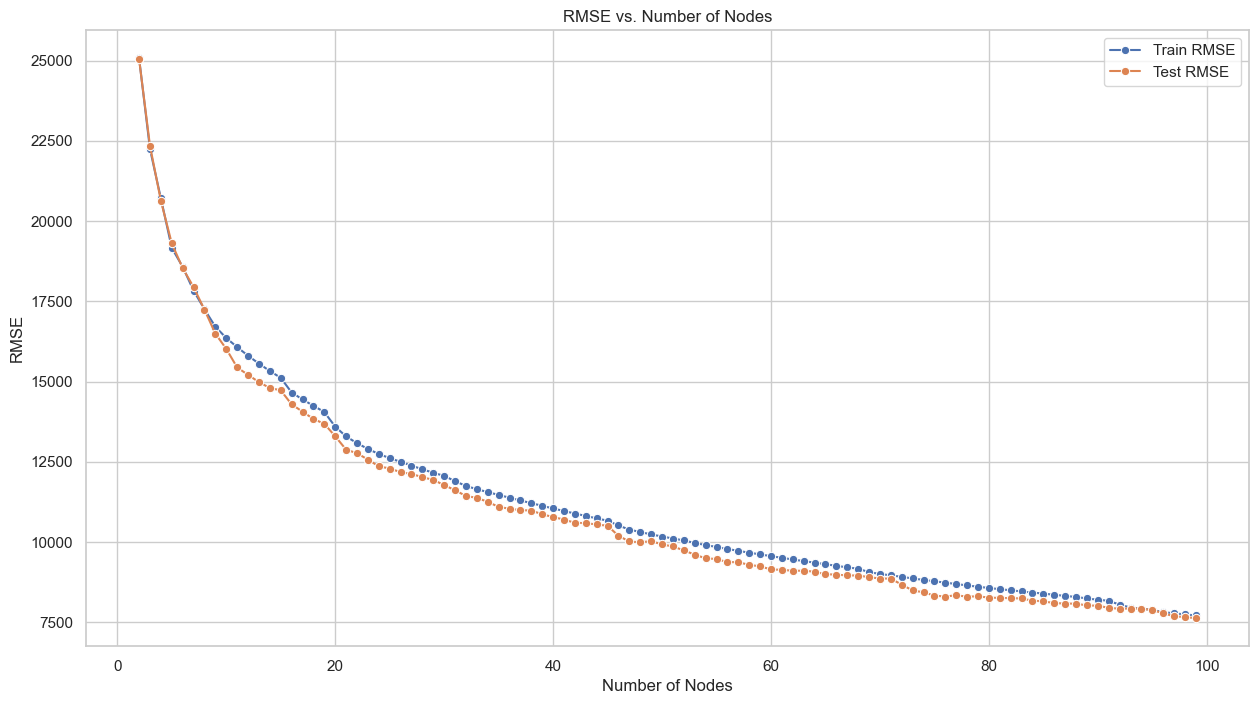

In [1008]:
max_leaf_nodes= []
rmse_train_l = []
rmse_test_l = []

for i in range(2, 100):
    # Create a DecisionTreeRegressor model with varying max_leaf_nodes
    model = DecisionTreeRegressor(max_leaf_nodes=i)

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the train data
    y_pred_train = model.predict(X_train_scaled)

    # Make predictions on the test data
    y_pred_test = model.predict(X_test_scaled)

    # Calculate RMSE for training and test sets
    rmse_train_i = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test_i = mean_squared_error(y_test, y_pred_test, squared=False)

    max_leaf_nodes.append(i)
    rmse_train_l.append(rmse_train_i)
    rmse_test_l.append(rmse_test_i)

plt.figure(figsize=(15, 8))
sns.lineplot(x=max_leaf_nodes, y=rmse_train_l, marker='o', label='Train RMSE')
sns.lineplot(x=max_leaf_nodes, y=rmse_test_l, marker='o', label='Test RMSE')
plt.title('RMSE vs. Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()

In [1009]:
X_test['y'] = y_test
X_test['Predicted'] = y_pred_test
X_test['Residual'] = abs(y_test - y_pred_test)/y_test
X_test[X_test['Residual'] > 0.3]

,Years_of_Experience,professionalism,Education_Level_median,Job_Title_frequency,Transformed_Job_Title,k_Means_Age,Encoded_Education_Level,y,Predicted,Residual
id,,,,,,,,,,
81,15.0,533.0,126916.0,278,15,1,2.0,80000.0,104800.951613,0.310012
82,2.0,0.0,80000.0,29,107,1,1.0,30000.0,44442.176871,0.481406
23,10.0,324.0,80000.0,2,100,1,1.0,60000.0,94333.333333,0.572222
89,7.0,186.0,80000.0,133,84,1,1.0,55000.0,81881.118881,0.488748
6483,9.0,280.0,170000.0,197,86,1,3.0,80000.0,104800.951613,0.310012


<Figure size 640x480 with 0 Axes>

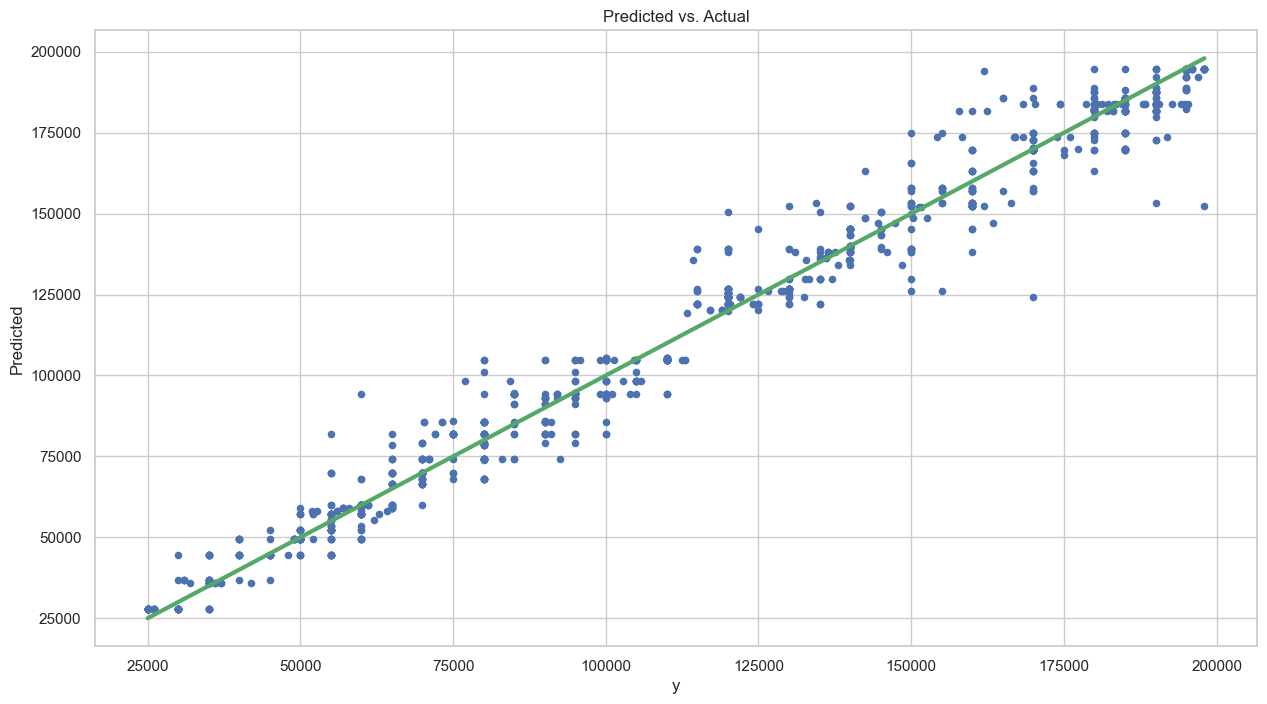

In [1010]:
plt.figure()
amin, amax = min(X_test['y']), max(X_test['y'])
ax = X_test.plot('y', 'Predicted', kind='scatter',
                #        c=colors, 
                    #  xlim=[amin, amax], ylim=[amin, amax],
                     title='Predicted vs. Actual',
                     figsize = (15,8))
ax.plot(np.linspace(amin, amax, 2), np.linspace(amin, amax, 2),
        linewidth=3, color='g')     

In [962]:
X = data[['Years_of_Experience', 'professionalism','Education_Level_median','Job_Title_frequency','Job_Title_mean_target']]
y = data.Salary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize and train multiple models

models = [LinearRegression(), DecisionTreeRegressor(max_leaf_nodes=40),KNeighborsRegressor(n_neighbors=4)]
for model in models:
    model.fit(X_train_scaled, y_train)

predictions_train = [model.predict(X_train_scaled) for model in models]    

# Make predictions with each model
predictions = [model.predict(X_test_scaled) for model in models]

# Calculate the mean predictions between models
mean_predictions_train = sum(predictions_train) / len(models)

# Calculate the mean predictions between models
mean_predictions = sum(predictions) / len(models)


# Evaluate mean predictions of the train data using RMSE
mean_rmse_train = mean_squared_error(y_train, mean_predictions_train, squared=False)
print(f"Mean Predictions of tarin (Ensemble Mean): RMSE = {mean_rmse_train}")

# Evaluate mean predictions using RMSE
mean_rmse = mean_squared_error(y_test, mean_predictions, squared=False)
print(f"Mean Predictions (Ensemble Mean): RMSE = {mean_rmse}")

Mean Predictions of tarin (Ensemble Mean): RMSE = 10701.378412575514
Mean Predictions (Ensemble Mean): RMSE = 11077.716853043308


In [963]:
X_test['y'] = y_test
X_test['Predicted'] = mean_predictions
X_test['Residual'] = abs(y_test - mean_predictions)/y_test
X_test[X_test['Residual'] > 0.3]

,Years_of_Experience,professionalism,Education_Level_median,Job_Title_frequency,Job_Title_mean_target,y,Predicted,Residual
id,,,,,,,,
274,4.0,60.0,130000.0,7,51428.571429,40000.0,53940.202335,0.348505
4140,6.0,124.0,121716.0,211,117781.990521,62000.0,90150.521417,0.454041
6558,5.0,108.0,170000.0,211,117781.990521,55000.0,72998.343016,0.327243
81,15.0,533.0,180000.0,278,125118.705036,80000.0,172652.689207,1.158159
4181,7.0,150.0,75000.0,423,113219.858156,75000.0,98934.603173,0.319128
82,2.0,0.0,130000.0,29,44137.931034,30000.0,39794.257974,0.326475
23,10.0,324.0,130000.0,2,65000.000000,60000.0,85237.210679,0.420620
6374,6.0,116.0,75000.0,108,149907.407407,55000.0,72766.791931,0.323033
6544,5.0,108.0,170000.0,211,117781.990521,55000.0,72998.343016,0.327243


<Figure size 640x480 with 0 Axes>

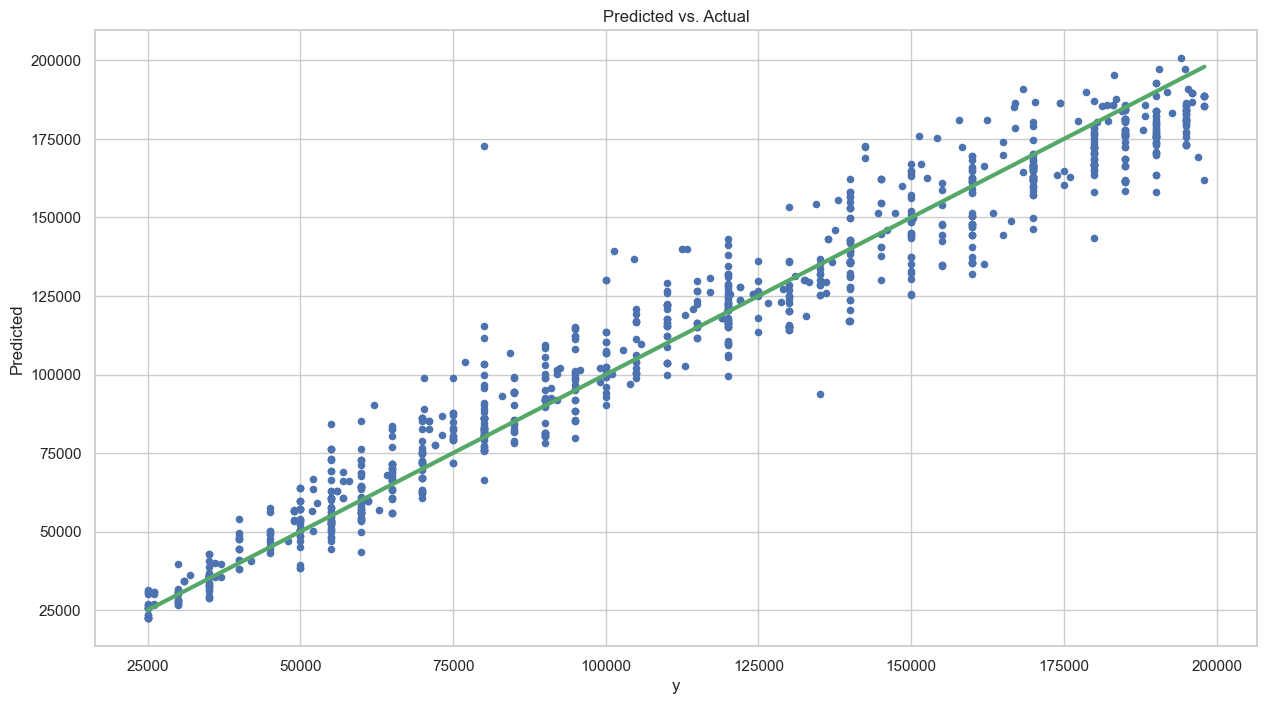

In [964]:
plt.figure()
amin, amax = min(X_test['y']), max(X_test['y'])
ax = X_test.plot('y', 'Predicted', kind='scatter',
                #        c=colors, 
                    #  xlim=[amin, amax], ylim=[amin, amax],
                     title='Predicted vs. Actual',
                     figsize = (15,8))
ax.plot(np.linspace(amin, amax, 2), np.linspace(amin, amax, 2),
        linewidth=3, color='g')    

In [965]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(data)
X_test_scaled = scaler.transform(X_test_pred)


model = KNeighborsRegressor(n_neighbors=5)  
# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the train data
y_pred_train = model.predict(X_train_scaled)

# Make predictions on the test data
y_pred_test = model.predict(X_test_scaled)

# Calculate RMSE
rmse_train = mean_squared_error(data, y_pred_train, squared=False)
# rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print(f'RMSE for train data: {rmse_train}')
# print(f'RMSE for test data: {rmse_test}')
X_test_pred

ValueError: could not convert string to float: 'M'